### Описательная статистика

In [1]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as sts

In [6]:
df = pd.read_csv('datasets/gender_classification.csv')
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [7]:
df_selected = df[['forehead_width_cm', 'long_hair', 'gender']]
df_selected.head(10)

,forehead_width_cm,long_hair,gender
0,11.8,1,Male
1,14.0,0,Female
2,11.8,0,Male
3,14.4,0,Male
4,13.5,1,Female
5,13.0,1,Male
6,15.3,1,Male
7,13.0,0,Female
8,11.9,1,Female
9,12.1,1,Female


## Центральные метрики

#### Математическое ожидание

In [8]:
print('Ширина лба:', st.mean(df['forehead_width_cm']))
print('Высота лба:', st.mean(df['forehead_height_cm']))

Ширина лба: 13.181483703259348
Высота лба: 5.946310737852429


### Средневзвешенное

In [9]:
w = [0.1, 0.2, 0.3, 0.25, 0.15]
df_head = df.head(5)
print('Ширина лба:', np.average(df_head['forehead_width_cm'], weights=w))
print('Высота лба:', np.average(df_head['forehead_height_cm'], weights=w))

Ширина лба: 13.145000000000001
Высота лба: 5.99


### Медиана

In [10]:
print('Ширина лба:', 'aver:', st.median(df['forehead_width_cm']), 'low:', st.median_low(df['forehead_width_cm']), 'high:', st.median_high(df['forehead_width_cm']))
print('Высота лба:', 'aver:', st.median(df['forehead_height_cm']), 'low:', st.median_low(df['forehead_height_cm']), 'high:', st.median_high(df['forehead_height_cm']))

Ширина лба: aver: 13.1 low: 13.1 high: 13.1
Высота лба: aver: 5.9 low: 5.9 high: 5.9


### Мода

In [11]:
print('Ширина лба:', st.mode(df['forehead_width_cm']))
print('Высота лба:', st.mode(df['forehead_height_cm']))

Ширина лба: 12.0
Высота лба: 5.7


### Минимум и максимум

In [12]:
print('Ширина лба:', 'min:', np.min(df['forehead_width_cm']), 'max:', np.max(df['forehead_width_cm']))
print('Высота лба:', 'min:', np.min(df['forehead_height_cm']) , 'max:', np.max(df['forehead_height_cm']))

Ширина лба: min: 11.4 max: 15.5
Высота лба: min: 5.1 max: 7.1


## Метрики оценки вариативности данных

### Дисперсия

In [13]:
print('Ширина лба:', st.pvariance(df['forehead_width_cm']))
print('Высота лба:', st.pvariance(df['forehead_height_cm']))

Ширина лба: 1.2254879805882455
Высота лба: 0.2929123041618431


### Стандартное отклонение

In [14]:
print('Ширина лба:', st.pstdev(df['forehead_width_cm']))
print('Высота лба:', st.pstdev(df['forehead_height_cm']))

Ширина лба: 1.1070176062684123
Высота лба: 0.5412137324217144


### Квантиль (процентиль)

5-й

In [15]:
print('Ширина лба:', np.percentile(df['forehead_width_cm'], 5))
print('Высота лба:', np.percentile(df['forehead_height_cm'], 5))

Ширина лба: 11.6
Высота лба: 5.1


95-й

In [17]:
print('Ширина лба:', np.percentile(df['forehead_width_cm'], 95))
print('Высота лба:', np.percentile(df['forehead_height_cm'], 95))

Ширина лба: 15.2
Высота лба: 6.9


25-й, 50-й, 75-й

In [18]:
print('Ширина лба:', np.percentile(df['forehead_width_cm'], [25, 50, 75]))
print('Высота лба:', np.percentile(df['forehead_height_cm'], [25, 50, 75]))

Ширина лба: [12.2 13.1 14. ]
Высота лба: [5.5 5.9 6.4]


### Размах

In [19]:
print('Ширина лба:', max(df['forehead_width_cm'])-min(df['forehead_width_cm']))
print('Высота лба:', max(df['forehead_height_cm'])-min(df['forehead_height_cm']))

Ширина лба: 4.1
Высота лба: 2.0


### Корреляция

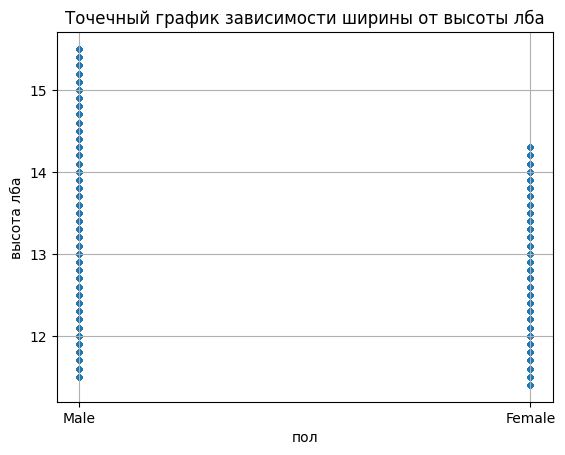

In [22]:
plt.xlabel('пол')
plt.ylabel('ширина лба')
plt.title('Точечный график зависимости ширины лба от пола')
plt.grid(True)
plt.scatter(df['gender'], df['forehead_width_cm'], marker='.')
plt.show()

### Описательная статистика Pandas

In [24]:
df_ = df.drop(columns=['distance_nose_to_lip_long'])
df_.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000


### Корреляция Пирсона

In [27]:
df['gender_num'] = (df['gender'] == 'Male').astype(int)
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_num
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0
5,1,13.0,6.8,1,1,1,1,Male,1
6,1,15.3,6.2,1,1,1,0,Male,1
7,0,13.0,5.2,0,0,0,0,Female,0
8,1,11.9,5.4,1,0,1,1,Female,0
9,1,12.1,5.4,0,0,0,0,Female,0


Коэффициент корреляции Пирсона: 0.3341250632120522


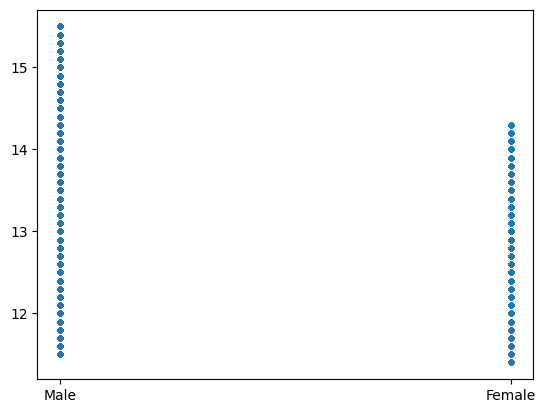

In [29]:
corr, p_value = pearsonr(df['gender_num'], df['forehead_width_cm'])
plt.scatter(df['gender'], df['forehead_width_cm'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.27719041906756764


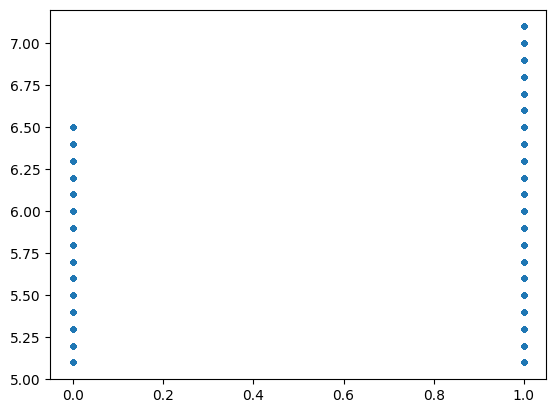

In [30]:
corr, p_value = pearsonr(df['gender_num'], df['forehead_height_cm'])
plt.scatter(df['gender_num'], df['forehead_height_cm'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

### Корреляция Спирмана

In [31]:
cor, p_value = sts.spearmanr(df['gender_num'], df['forehead_width_cm'])
print(cor)

0.3130083630111466


In [32]:
cor, p_value = sts.spearmanr(df['gender_num'], df['forehead_height_cm'])
print(cor)

0.251226680540353


### Тау Кендалла

In [33]:
cor, p_value = sts.kendalltau(df['gender_num'], df['forehead_width_cm'])
print(cor)

0.25887774212220205


In [34]:
cor, p_value = sts.kendalltau(df['gender_num'], df['forehead_height_cm'])
print(cor)

0.2104611149827891


### Корреляция Pandas

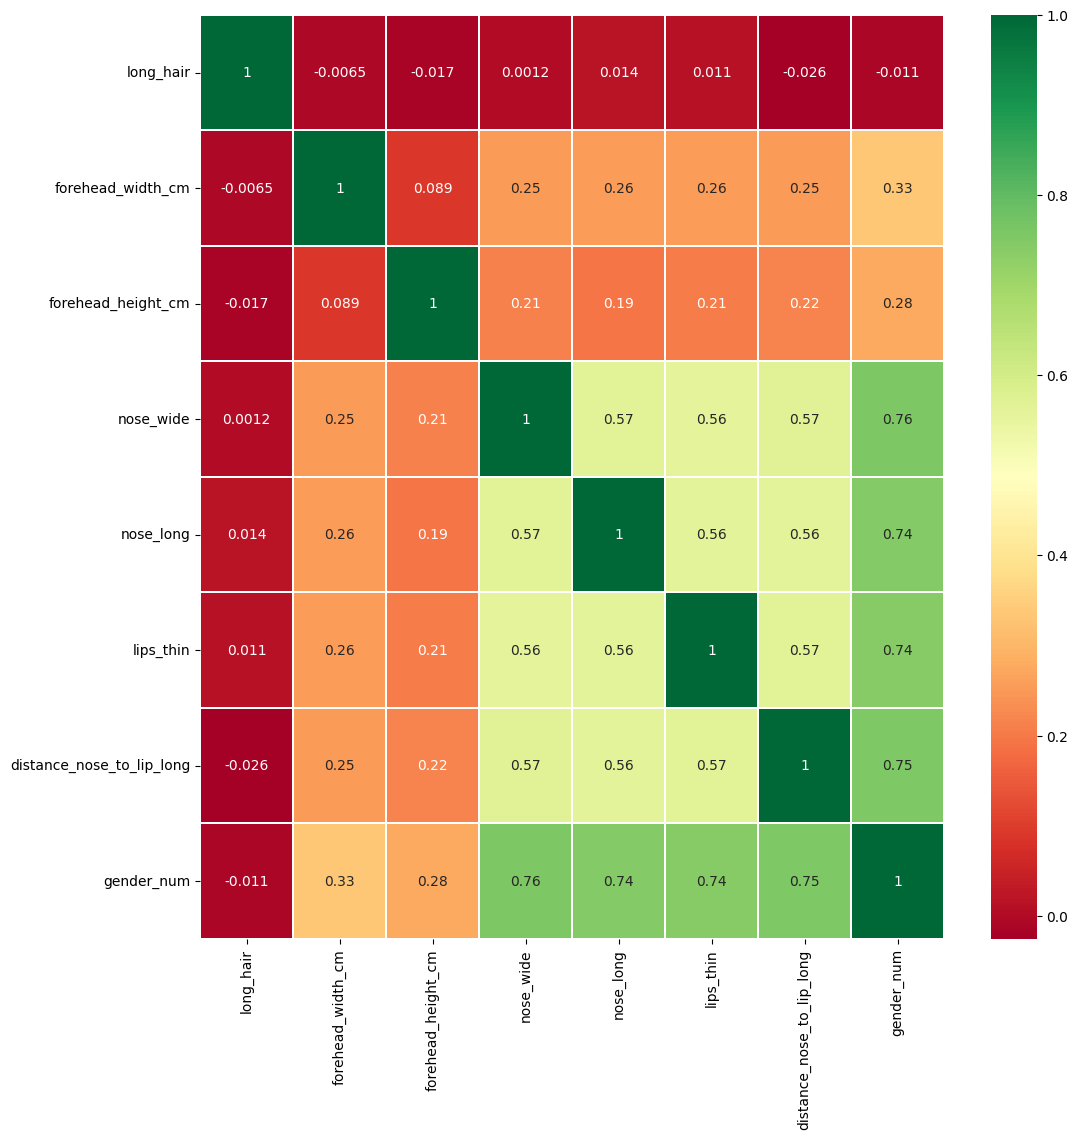

In [37]:
import seaborn as sns
df_ = df.drop(columns=['gender'])
sns.heatmap(df_.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### Выбросы

In [38]:
df['gender_num'].isnull().sum()

0

In [39]:
df['forehead_width_cm'].isnull().sum()

0

In [40]:
df['forehead_height_cm'].isnull().sum()

0

Нулевых значений в колонках нет

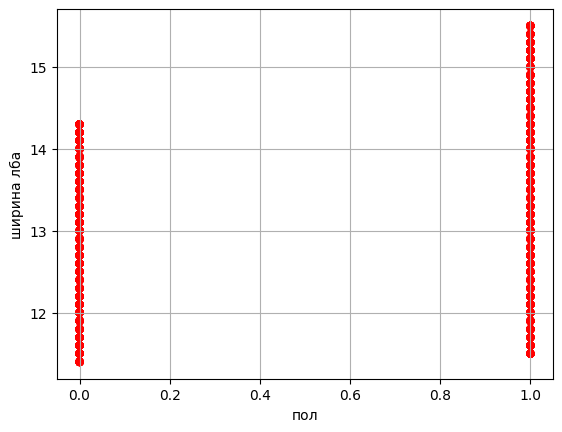

In [42]:
gen = df['gender_num']
forehead_width = df['forehead_width_cm']
fig, ax = plt.subplots()
ax.scatter(gen, forehead_width, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('пол')
plt.ylabel('ширина лба')
plt.show()

### Коэффициент островершинности (куртосис)

In [43]:
print('Ширина лба:', sts.kurtosis(df['forehead_width_cm'], axis=0, fisher=True, bias=True))
print('Высота лба:', sts.kurtosis(df['forehead_height_cm'], axis=0, fisher=True, bias=True))
print('Пол:', sts.kurtosis(df['gender_num'], axis=0, fisher=True, bias=True))

Ширина лба: -0.930865697789264
Высота лба: -0.8492405071581102
Пол: -1.9999998400639738


### Коэффициент асимметрии

In [45]:
print('Ширина лба:', sts.skew(df['forehead_width_cm'], axis=0, bias=True))
print('Высота лба:', sts.skew(df['forehead_height_cm'], axis=0, bias=True))
print('Пол:', sts.skew(df['gender_num'], axis=0, bias=True))

Ширина лба: 0.24216884127602942
Высота лба: 0.2506634571052811
Пол: 0.00039992002399174707


In [47]:
print('Ширина лба (мат. ожидание):', st.mean(df['forehead_width_cm']))
print('Ширина лба (медиана):', 'aver:', st.median(df['forehead_width_cm']), 'low:', st.median_low(df['forehead_width_cm']), 'high:', st.median_high(df['forehead_width_cm']))
print('Ширина лба (мода):', st.mode(df['forehead_width_cm']))

Ширина лба (мат. ожидание): 13.181483703259348
Ширина лба (медиана): aver: 13.1 low: 13.1 high: 13.1
Ширина лба (мода): 12.0
